# Homework 7 Template

Rixin Li & G . Besla



In [ ]:
 # Make edits where instructed - look for "****", which indicates where you need to add code. 

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const
# import Latex module so we can display the results with symbols
from IPython.display import Latex
%matplotlib inline

# **** import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass2 import CenterOfMass

# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass



# M33AnalyticOrbit

In [83]:
class M33AnalyticOrbit:
    """ Calculate the analytical orbit of M33 around M31 """
    
    def __init__(self, filename): # **** add inputs
        """ This class calculates the position and velocity of the center of mass
        for M33.
        
        Inputs: 
            filename: txt file
                text file of the orbit of M33
        
        """
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### **** store the output file name
        self.outputfilename = 'integrated_orbit.txt'
        
        ### get the current pos/vel of M33 
        # **** create an instance of the  CenterOfMass class for M33 
        COM_M33 = CenterOfMass('M33_000.txt', 2) # disk particles

        # **** store the position VECTOR of the M33 COM (.value to get rid of units)
        COM_p_M33 = COM_M33.COM_P(0.1,4)

        # **** store the velocity VECTOR of the M33 COM (.value to get rid of units)
        COM_v_M33 = COM_M33.COM_V(COM_p_M33[0], COM_p_M33[1], COM_p_M33[2])
        
        COM_p_M33 = COM_p_M33.value
        COM_v_M33 = COM_v_M33.value
        ### get the current pos/vel of M31 
        # **** create an instance of the  CenterOfMass class for M31 
        COM_M31 = CenterOfMass('M31_000.txt', 2)
        
        # **** store the position VECTOR of the M31 COM (.value to get rid of units)
        COM_p_M31 = COM_M31.COM_P(0.1,2)
        
        # **** store the velocity VECTOR of the M31 COM (.value to get rid of units)
        COM_v_M31 = COM_M31.COM_V(COM_p_M31[0], COM_p_M31[1], COM_p_M31[2]).value
        
        COM_p_M31 = COM_p_M31.value
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # **** create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = COM_p_M33 - COM_p_M31
        self.v0 = COM_v_M33 - COM_v_M31
        
        ### get the mass of each component in M31 
        ### disk
        # **** self.rdisk = scale length (no units)
        self.rdisk = 5 #kpc
        # **** self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mdisk = 0.120*1e12
        
        
        ### bulge
        # **** self.rbulge = set scale length (no units)
        self.rbulge = 1 #kpc
        # **** self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units Use the right ptype
        self.Mbulge = 0.019*1e12
        
        # Halo
        # **** self.rhalo = set scale length from HW5 (no units)
        self.rhalo = 62
        # **** self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mhalo = 1.921*1e12
    
    
    def HernquistAccel(self, M, r_a, r_vec): # it is easiest if you take as an input the position VECTOR 
        """ This function calculates the acceleration vector using the Hernquist profile
        
        accel_vec = -GM/(r_mag*(r_a + r_mag)^2)* r_vec
        
        Inputs:
                M: 'float'
                    The total halo or bulge mass
                r_a:'float'
                    the scale length
                
                r_vec:'float'
                    the vector of the relative position
                
        Outputs:
                Hern: 'numpy array'
                    acceleration vector for either the halo or bulge component of M33
        """
        
        ### **** Store the magnitude of the position vector
        rmag = np.sqrt(r_vec[0]**2 + r_vec[1]**2 + r_vec[2]**2 )
        
        ### *** Store the Acceleration
        Hern =  -self.G*M/(rmag *(r_a + rmag)**2) * r_vec 
        
        #follow the formula in the HW instructions
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR 
        
        return Hern
    
    
    
    def MiyamotoNagaiAccel(self, M, r_a, r_vec):# it is easiest if you take as an input a position VECTOR  r 
        """ This function calculates the acceleration vector using the Miyamoto-Nagai 1975 profile
        
        accel_vec = -GM/((R^2+B^2)^1.5)* r_vec * (1,1,B/sqrt(z^2+zd^2))
        R = sqrt(x^2+y^2)
        B = rd+sqrt(z]**2+zd**2)
        
        Inputs:
                M: 'float'
                    The total disk mass
                r_a:'float'
                    the scale length of the disk
                
                r_vec:'float'
                    the vector of the relative position of M33
                
        Outputs:
                MiyamotoAccel: 'numpy array'
                    acceleration vector for either the disk component of M33
        """
 
        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for the 
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        rd = self.rdisk
        zd = self.rdisk/5.
        
        R = np.sqrt(r_vec[0]**2+r_vec[1]**2)
        B = rd+np.sqrt(r_vec[2]**2+zd**2)
        
        Miyamoto = -(self.G*M/(R**2+B**2)**1.5)*r_vec
        
        ZSTUFF = B/np.sqrt(r_vec[2]**2+zd**2)
        MiyamotoAccel = Miyamoto*np.array([1,1,ZSTUFF])
        
       
        return MiyamotoAccel
        # the np.array allows for a different value for the z component of the acceleration
     
    
    def M31Accel(self, r_vec): # input should include the position vector, r
        """ **** ADD COMMENTS """

        ### Call the previous functions for the halo, bulge and disk
        halo_accel = self.HernquistAccel(self.Mhalo, self.rhalo, r_vec)
        bulge_accel = self.HernquistAccel(self.Mbulge, self.rbulge, r_vec)
        disk_accel = self.MiyamotoNagaiAccel(self.Mdisk, self.rdisk, r_vec)
        # **** these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc. 
            
        # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        return halo_accel+bulge_accel+disk_accel
    
    
        # this might be wrong
    
    
    def LeapFrog(self,dt, r_vec, v_vec): # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        """ **** ADD COMMENTS """
        
        # predict the position at the next half timestep
        rhalf = r_vec + v_vec*dt/2
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        accel = self.M31Accel(rhalf)
        vnew = v_vec + accel*dt
        
        # predict the final position using the average of the current velocity and the final velocity
        # this accounts for the fact that we don't know how the speed changes from the current timestep to the 
        # next, so we approximate it using the average expected speed over the time interval dt. 
        rnew = rhalf + vnew*dt/2
        
        return rnew, vnew # **** return the new position and velcoity vectors
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
        """ **** ADD COMMENTS """

        # initialize the time to the input starting time
        t = t0
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros((int(tmax/dt)+2, 7))
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]
        print(orbit[0])
        
        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t<tmax):  # as long as t has not exceeded the maximal time 
            
            # **** advance the time by one timestep, dt
            t+=dt
            # **** store the new time in the first column of the ith row
            orbit[i, 0] = t
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            #print(orbit)
            pos_orbit = np.array([orbit[i-1][1], orbit[i-1][2], orbit[i-1][3]])
            
            vel_orbit = np.array([orbit[i-1][4], orbit[i-1][5], orbit[i-1][6]])
            
            r, v = self.LeapFrog(dt,pos_orbit,vel_orbit)
         
            
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            # TIP:  if you want columns 5-7 of the Nth row of an array called A, you would write : 
            # A[n, 5:8] 
            # where the syntax is row n, start at column 5 and end BEFORE column 8
            orbit[i,1:4] = r 
            
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            orbit[i,4:7] = v
            
            # **** update counter i , where i is keeping track of the number of rows (i.e. the number of time steps)
            i+=1
        
        
        # write the data to a file
        np.savetxt(self.outputfilename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function
        
        
        

In [84]:
M33_orbit = M33AnalyticOrbit('M33_000.txt') # disk particles
M33_orbit.OrbitIntegration(0, .1, 10)

[   0.    -98.45 -120.03 -127.81  -27.7   174.12   92.49]


In [85]:
M33_orbit = np.genfromtxt('integrated_orbit.txt',dtype=None,names=True) 
M33_orbit_t = M33_orbit['t']

M33_orbit_x = M33_orbit['x']
M33_orbit_y = M33_orbit['y']
M33_orbit_z = M33_orbit['z']

M33_orbit_vx = M33_orbit['vx']
M33_orbit_vy = M33_orbit['vy']
M33_orbit_vz = M33_orbit['vz']

M33_orbit_r = np.sqrt(M33_orbit_x**2+M33_orbit_y**2+M33_orbit_z**2)
M33_orbit_vr = np.sqrt(M33_orbit_vx**2+M33_orbit_vy**2+M33_orbit_vz**2)



102


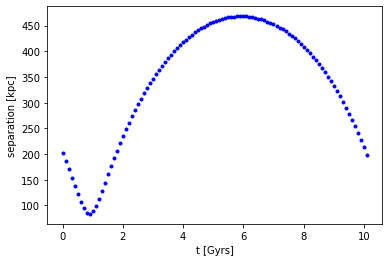

Text(0, 0.5, 'separation [kpc]')

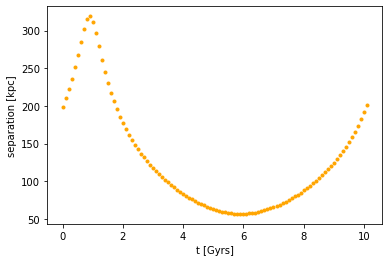

In [86]:
plt.plot(t, M33_orbit_r,'.', color='blue')
plt.xlabel('t [Gyrs]')
plt.ylabel('separation [kpc]')
plt.show()
plt.plot(t, M33_orbit_vr, '.', color='orange')
plt.xlabel('t [Gyrs]')
plt.ylabel('separation [kpc]')

800


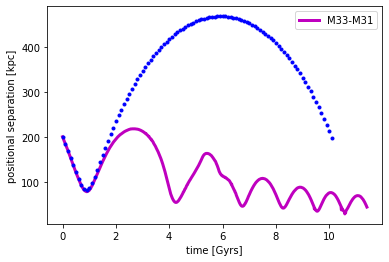

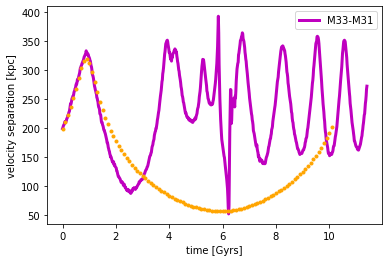

In [89]:
M31_data = np.genfromtxt('Orbit_M31.txt')
print(len(M31_data))
M33_data = np.genfromtxt('Orbit_M33.txt')

def mag_difference(x1, x2, y1, y2, z1, z2):
    '''
    This function computes the magnitude of the difference between two vectors.
    
    inputs:
        vec1: 'numpy array'
            an array of the first vector
        vec2: 'numpy array'
            an array of the second vector
    outputs:
        pos_rel:'array'
            relative position of the vectors
        vec_rel:'array'
            relative velocity of the two galaxies
    '''
    
    mag = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    
    return mag

#getting the columns for the M31
M31_t = M31_data[:,0]
M31_x = M31_data[:,1]
M31_y = M31_data[:,2]
M31_z = M31_data[:,3]
M31_vx = M31_data[:,4]
M31_vy = M31_data[:,5]
M31_vz = M31_data[:,6]
#getting the columns for the M33
M33_t = M33_data[:,0]
M33_x = M33_data[:,1]
M33_y = M33_data[:,2]
M33_z = M33_data[:,3]
M33_vx = M33_data[:,4]
M33_vy = M33_data[:,5]
M33_vz = M33_data[:,6]


# findimg the separation between M33 and M31
M33_M31_diff_pos = mag_difference(M33_x, M31_x,
                                  M33_y, M31_y,
                                  M33_z, M31_z)

# finding the velocity separation between M33 and M31
M33_M31_diff_vel = mag_difference(M33_vx, M31_vx, 
                                  M33_vy, M31_vy,
                                  M33_vz, M31_vz)


#plt.plot(M31_t, MW_M31_diff_pos,color='c', linewidth = 3, label='MW-M31')
plt.plot(M31_t, M33_M31_diff_pos,color='m', linewidth=3, label='M33-M31')
plt.plot(t, M33_orbit_r,'.', color='blue')
plt.ylabel('positional separation [kpc]')
plt.xlabel('time [Gyrs]')

plt.legend()    
plt.show()

# Plot the orbital velocities of the galaxies 
#################################
plt.plot(M31_t, M33_M31_diff_vel,color='m', linewidth=3, label='M33-M31')
plt.plot(t, M33_orbit_vr,'.', color='orange')
plt.ylabel('velocity separation [kpc]')
plt.xlabel('time [Gyrs]')
plt.legend()

# How do the plots compare?

We see that the for the position plots, the positions start out the same, but deviate after about 1.8Gyrs.
The purple line shows multiple times where the separation between M31 and M33 are at a local mimimum and maximum, but the blue line shows us that the separation between M31 and M33 peaks at about 6 Gyrs. In parallel, we see in the velocity figure, in orange, that there is one minimum point when the velocity separation is smallest at about 6 Gyrs. This is due to us only taking into account the graviatinal effects of just M31 on M33 and not accounting for the MW. So, these plots in blue and orange are showing only the graviational effects of M31 on M33 in isolation.

# what missing physics could make a difference?


The main force we did not account for that would make a difference is dynamical friction.
From the blue and orange plots we see that there is no drag on M33 which otherwise would've caused the orbit of M33 to decay similar to the purple line.

# the milky way is missing in these calculations. How might you include it's effects?


You would need to find the relative position and velocity of M33 compared to the MW. 
To caluclate the gravitational acceleration, we would have to account for both the force on M33 from M31 and the force on M33 from the MW and add those two forces together. We would have to do this for each component of the galaxy where we use the Hernqiust profile for the halo and bulge and the Miyamoto-Nagai profile for the disk particles.
Then you would use the leapfrog function to integrate this orbit.